# Author - Akash Gupta


# The Sparks Foundation 


# Task 4: Performing EDA on Global Terrorism

# Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%matplotlib inline helps us to display our plots without using the plt.show function

# Importing the dataset

In [3]:
data = pd.read_csv('GlobalTerrorism.csv',encoding='latin-1')

C:\Users\AKASH\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Using pandas to import our data 

# Looking at the first five rows

In [5]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


It is evident that their are too many columns in the dataset and most of them are not required for our analysis.We will drop the unwanted columns and also rename the columns for our convenience.


# Renaming the required columns

In [4]:
data.rename(columns = {'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country','provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type'},inplace = True)
    


Using inplace = True helps us to make changes in the dataframe without the assignment operator

# Extracting the required columns

In [5]:
data = data[['Year','Month','Day','Extended','Country','State','Region','AttackType','Target','Killed','Wounded','Group','Target_type','Weapon_type','city','latitude','longitude']]

In [8]:
data.head()

,Year,Month,Day,Extended,Country,State,Region,AttackType,Target,Killed,Wounded,Group,Target_type,Weapon_type,city,latitude,longitude
0,1970,7,2,0,Dominican Republic,NaN,Central America & Caribbean,Assassination,Julio Guzman,1.0,0.0,MANO-D,Private Citizens & Property,Unknown,Santo Domingo,18.456792,-69.951164
1,1970,0,0,0,Mexico,Federal,North America,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,23rd of September Communist League,Government (Diplomatic),Unknown,Mexico city,19.371887,-99.086624
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Assassination,Employee,1.0,0.0,Unknown,Journalists & Media,Unknown,Unknown,15.478598,120.599741
3,1970,1,0,0,Greece,Attica,Western Europe,Bombing/Explosion,U.S. Embassy,NaN,NaN,Unknown,Government (Diplomatic),Explosives,Athens,37.997490,23.762728
4,1970,1,0,0,Japan,Fukouka,East Asia,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,Fukouka,33.580412,130.396361


In [7]:
data = data[data['State'] != 'Unknown']
data = data[data['Weapon_type'] != 'Unknown']

# Finding the number of rows and columns

In [9]:
data.shape

(181691, 17)

# Missing Values

In [10]:
data.isnull().sum()

Year               0
Month              0
Day                0
Extended           0
Country            0
State            421
Region             0
AttackType         0
Target           636
Killed         10313
Wounded        16311
Group              0
Target_type        0
Weapon_type        0
city             434
latitude        4556
longitude       4557
dtype: int64

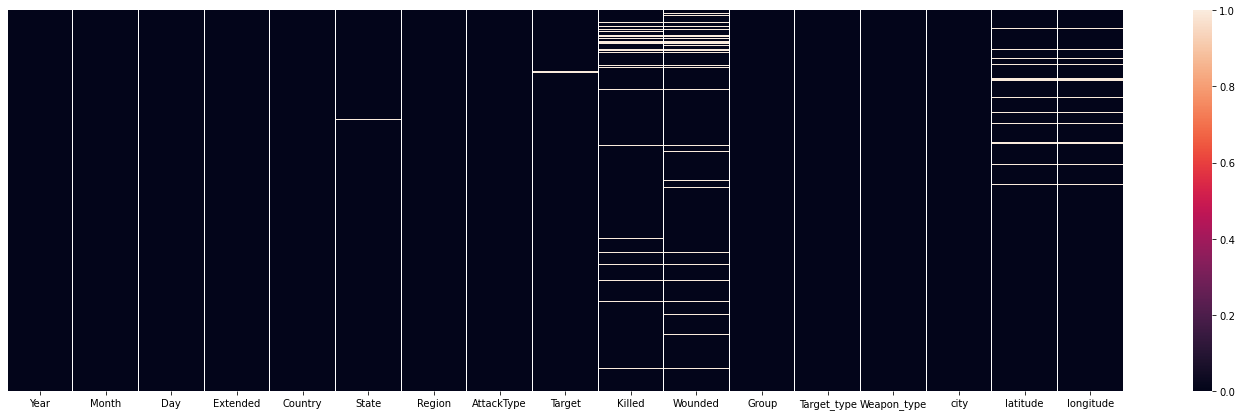

In [11]:
sns.heatmap(data.isnull(),yticklabels = False)

We can observe that no column in the dataset contains more than 10% null values 

# Dropping null values


In [6]:
data.dropna(inplace = True)

# Information about rows and columns

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159570 entries, 1 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         159570 non-null  int64  
 1   Month        159570 non-null  int64  
 2   Day          159570 non-null  int64  
 3   Extended     159570 non-null  int64  
 4   Country      159570 non-null  object 
 5   State        159570 non-null  object 
 6   Region       159570 non-null  object 
 7   AttackType   159570 non-null  object 
 8   Target       159570 non-null  object 
 9   Killed       159570 non-null  float64
 10  Wounded      159570 non-null  float64
 11  Group        159570 non-null  object 
 12  Target_type  159570 non-null  object 
 13  Weapon_type  159570 non-null  object 
 14  city         159570 non-null  object 
 15  latitude     159570 non-null  float64
 16  longitude    159570 non-null  float64
dtypes: float64(4), int64(4), object(9)
memory usage: 21.9+ MB


# Summary Statistics

In [84]:
data.describe()

,Year,Month,Day,Extended,Killed,Wounded,latitude,longitude
count,159570.000000,159570.000000,159570.000000,159570.000000,159570.000000,159570.000000,159570.000000,1.595700e+05
mean,2003.508398,6.487391,15.528000,0.032356,2.092361,3.199568,23.700442,-5.100348e+02
std,12.711726,3.387246,8.802103,0.176944,9.763436,36.551306,18.302237,2.157549e+05
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07
25%,1992.000000,4.000000,8.000000,0.000000,0.000000,0.000000,11.840929,8.663381e+00
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,0.000000,31.569021,4.378420e+01
75%,2014.000000,9.000000,23.000000,0.000000,2.000000,2.000000,34.621521,6.914701e+01
max,2017.000000,12.000000,31.000000,1.000000,1384.000000,8191.000000,74.633553,1.793667e+02


# Top 5 worst hit countries

Text(0, 0.5, 'Number of time attacked from 1970 to 2017')

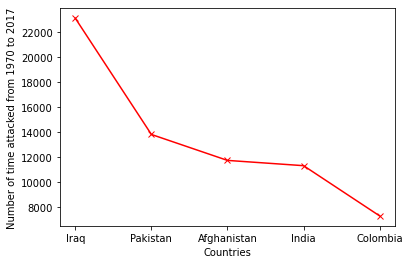

In [85]:
Attacked_country = data['Country'].value_counts()
Attacked_country = Attacked_country.sort_values(ascending = False)
worst_hit_country = Attacked_country[:5]
plt.plot(worst_hit_country,color = 'r',marker = 'x')
plt.xlabel("Countries")
plt.ylabel("Number of time attacked from 1970 to 2017")

The top five countries most prone to terrorist attacks are plotted above.This displays the need of strong plans and commitment for the civilians safety.

# Extracting Top 5 worst hit cities

Text(0, 0.5, 'Number of times attacked from 1970 to 2017')

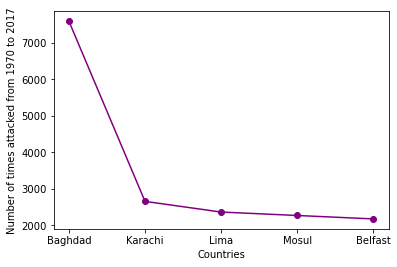

In [79]:
Attacked_city = data['city'].value_counts()
Attacked_city = Attacked_city.sort_values(ascending = False)
Worst_hit_city = Attacked_city[1:6]
plt.plot(Worst_hit_city,marker = 'o',color = 'purple')
plt.xlabel('Countries')
plt.ylabel('Number of times attacked from 1970 to 2017')


The most attacked cities have been plotted above. Baghdad lies in Iraq Similarly Karachi is in Pakistan Lima in Peru Mosul in Iraq Belfast in Northern Ireland It is astonishing to see that the top cities do not contain any city from India and Afghanistan indicating that the attacks on thesetwo countries are more spread out rather than being contained to a specific region

# Top 5 States


Text(0, 0.5, 'Number of times attacked from 1970 to 2017')

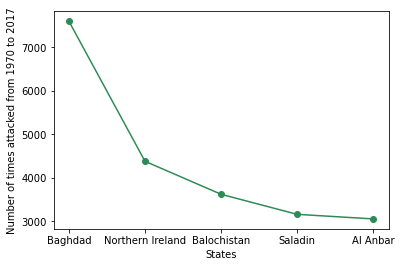

In [8]:
Attacked_state = data['State'].value_counts()
Attacked_state = Attacked_state.sort_values(ascending = False)
Worst_hit_state = Attacked_state[:5]
plt.plot(Worst_hit_state,marker = 'o',color = 'seagreen')
plt.xlabel('States')
plt.ylabel('Number of times attacked from 1970 to 2017')

# Top 5 Worst Hit Region

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

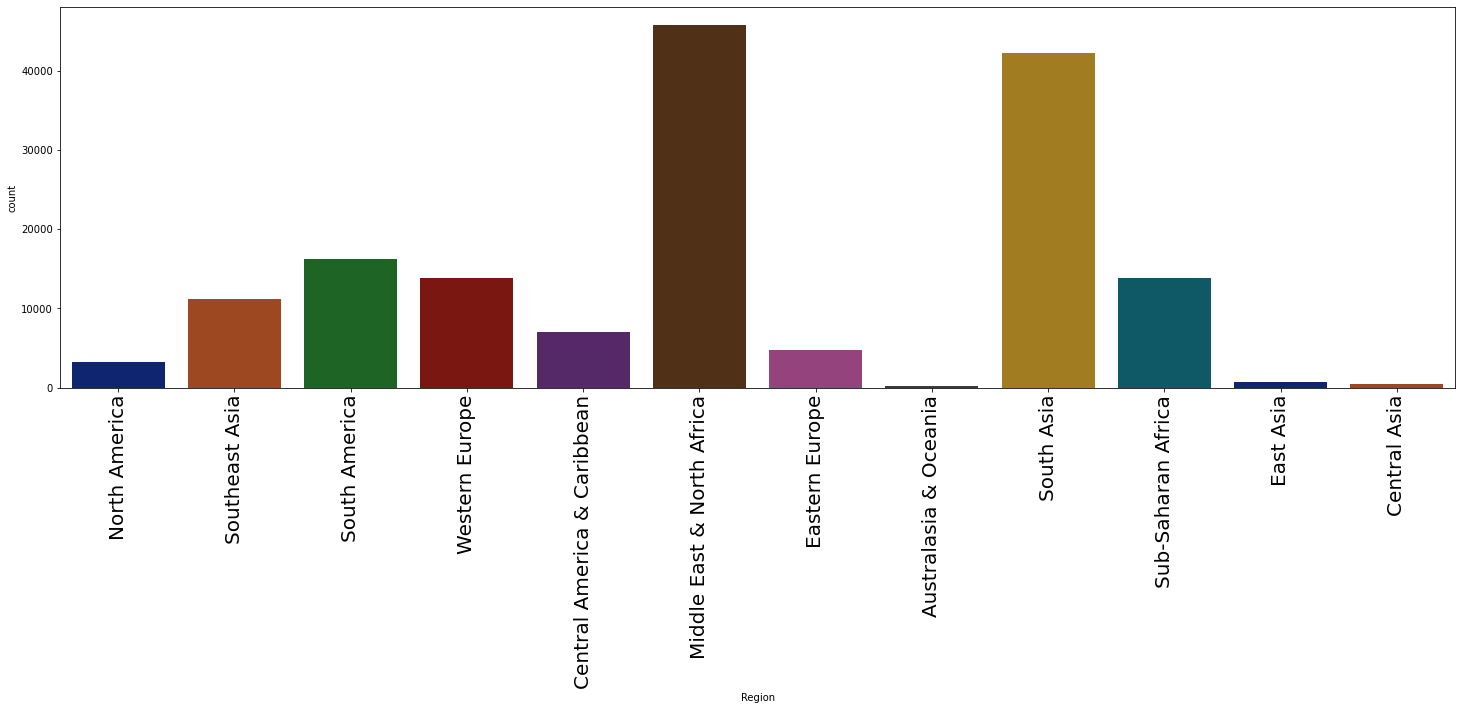

In [95]:
plt.rcParams['figure.figsize'] = (25, 7)
ax = sns.countplot(x = 'Region',data = data,palette = 'dark')
plt.xticks(rotation = 90,fontsize = 20)


The graph clearly indicates that the Middle East and North Africa is the most affected region in the world.

# Most Used Attack Method

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

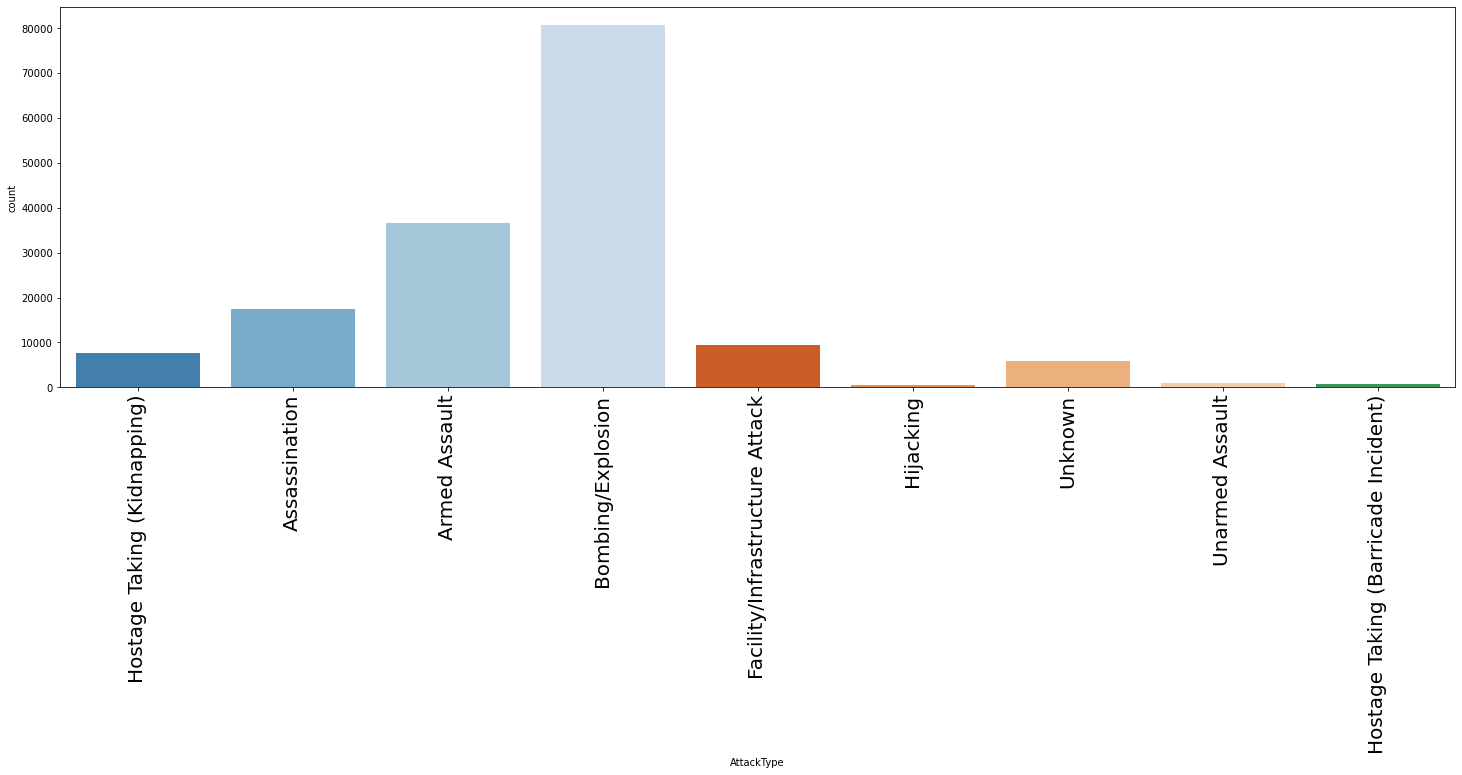

In [94]:
plt.rcParams['figure.figsize'] = (25, 7)
ax = sns.countplot(x = 'AttackType',data = data,palette = 'tab20c')
plt.xticks(rotation = 90,fontsize = 20)

Bombing Explosions are the most used technique for terrorist attacks

# Most Common Target For any Attack

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text major ticklabel objects>)

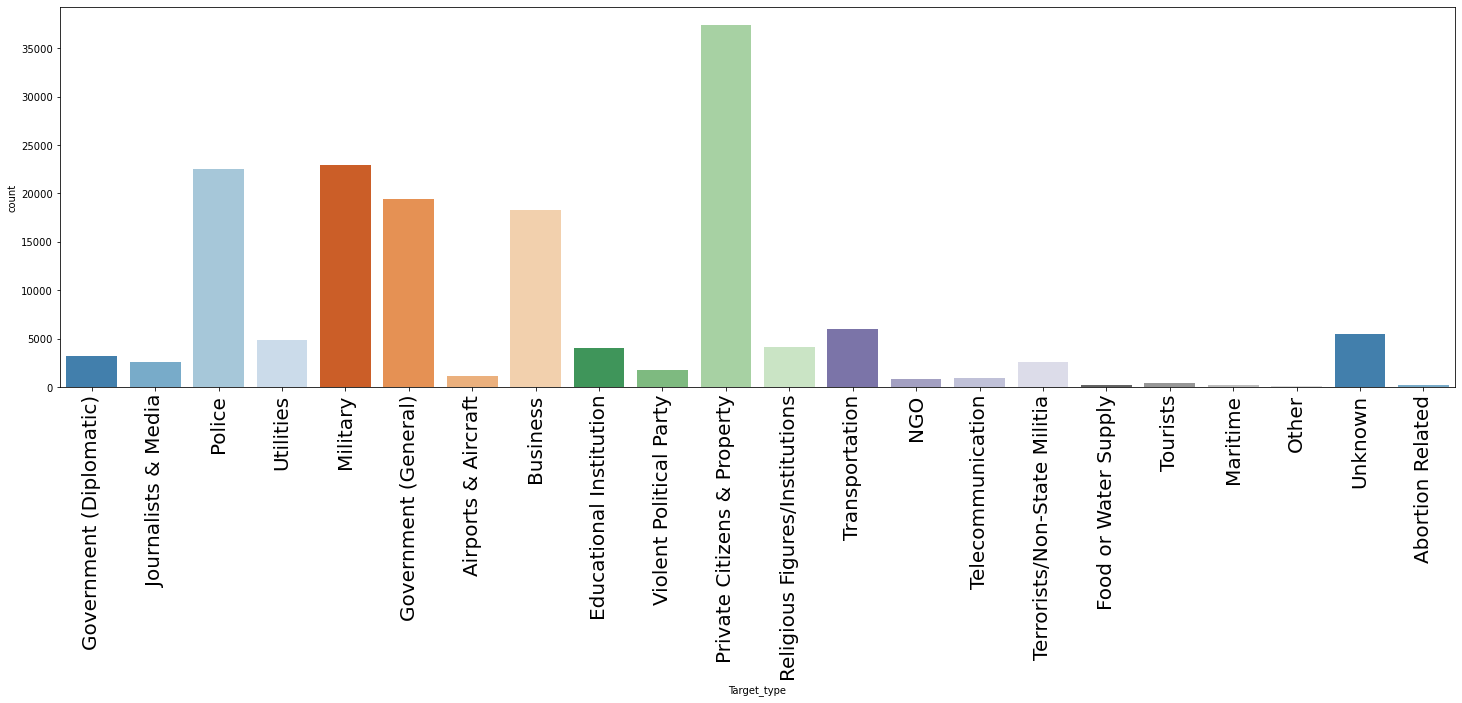

In [14]:
plt.rcParams['figure.figsize'] = (25, 7)
ax = sns.countplot(x = 'Target_type',data = data,palette = 'tab20c')
plt.xticks(rotation = 90,fontsize = 20)

Private Citizens and property have been the biggest target for terrorist attacks followed by Military establishments

# Biggest Terrorist Groups

Text(0.5, 1.0, 'Biggest Terrorist Groups')

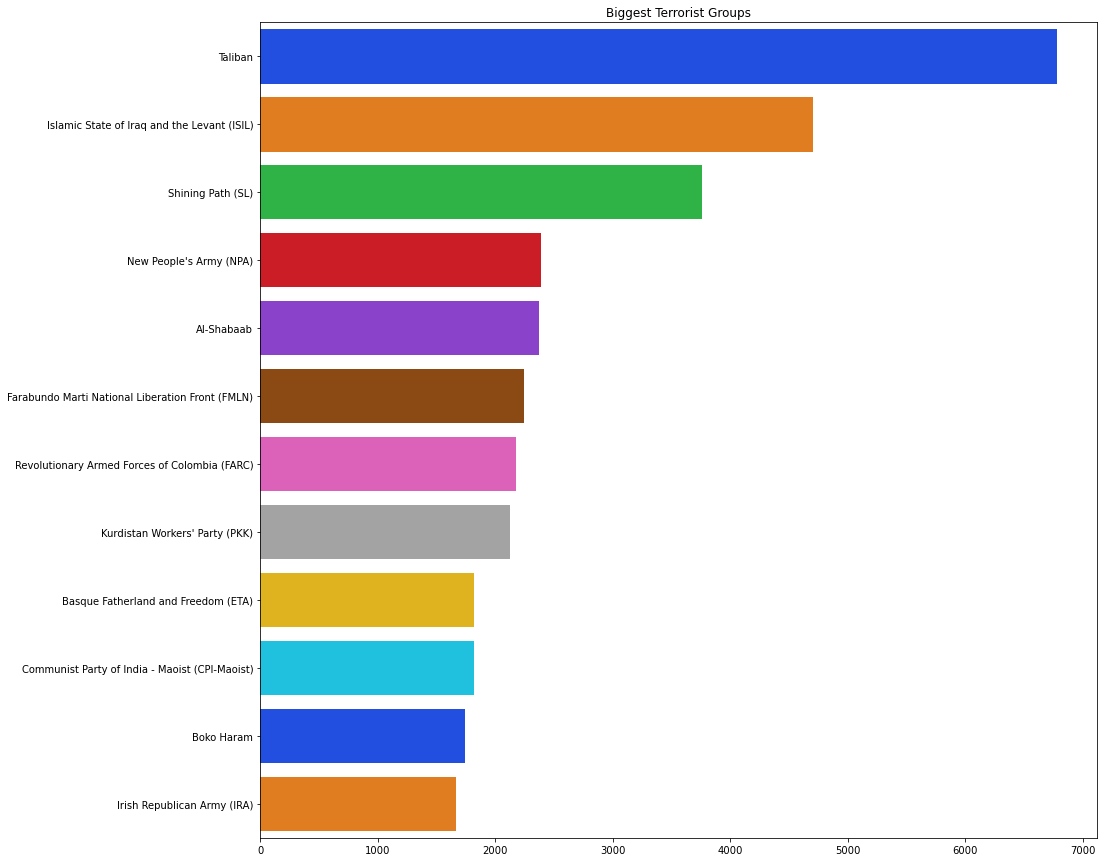

In [25]:
plt.subplots(figsize = (15,15))
sns.barplot(y=data.Group.value_counts()[1:13].index,x=data.Group.value_counts()[1:13].values,palette = 'bright')
plt.title('Biggest Terrorist Groups')

Taliban is the most active organization followed by ISIL.
Steps should be taken to subdue these organizations.

# Terrorist Activity Year-Wise

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

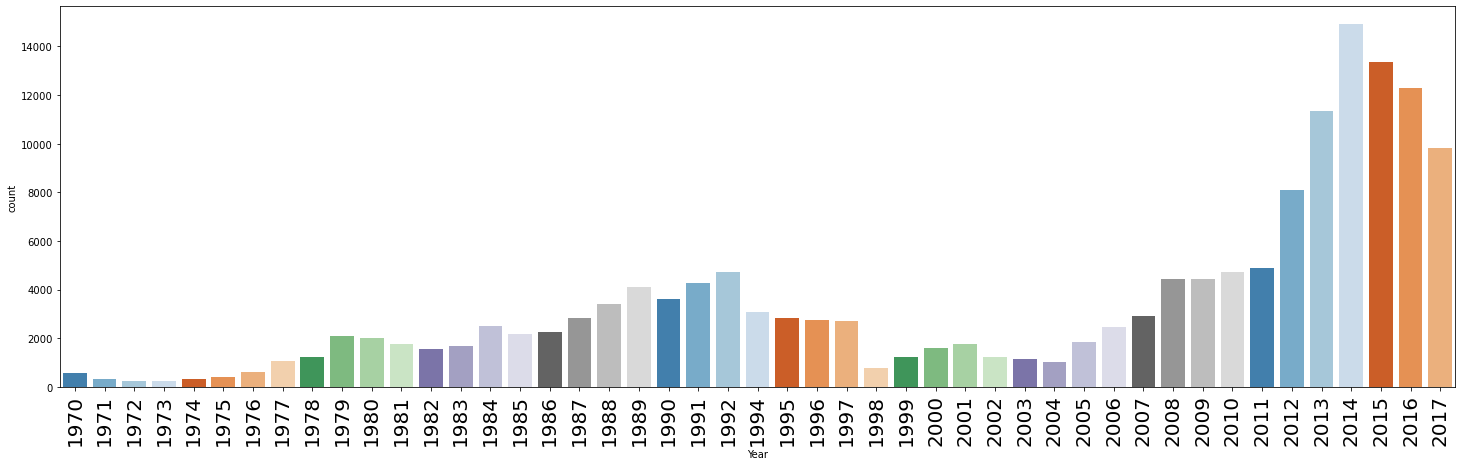

In [36]:
plt.rcParams['figure.figsize'] = (25, 7)
ax = sns.countplot(x = 'Year',data = data,palette = 'tab20c')
plt.xticks(rotation = 90,fontsize = 20)

2014 has been the worst year with highest number of terrorist attacks and their has been a gradual decrease since then!

# Month with most Attacks

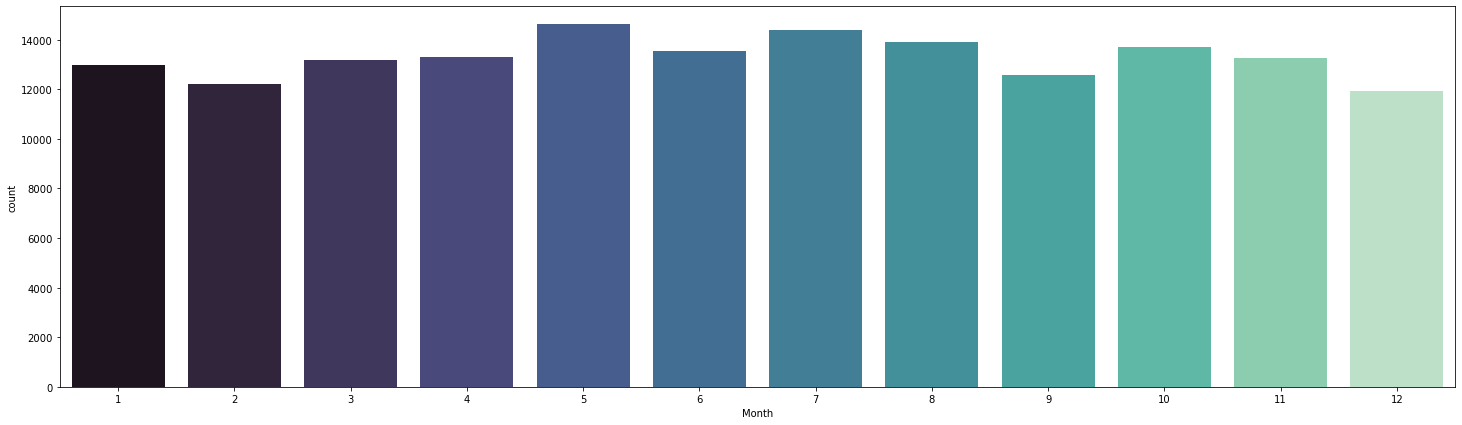

In [43]:
fig,ax = plt.subplots()
data = data[data['Month'] > 0]
ax = sns.countplot(x = 'Month',data = data,palette = 'mako')

The month of May has seen the most number of attacks though it is not very high compared to other months.

# Most Used Weapon Type

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

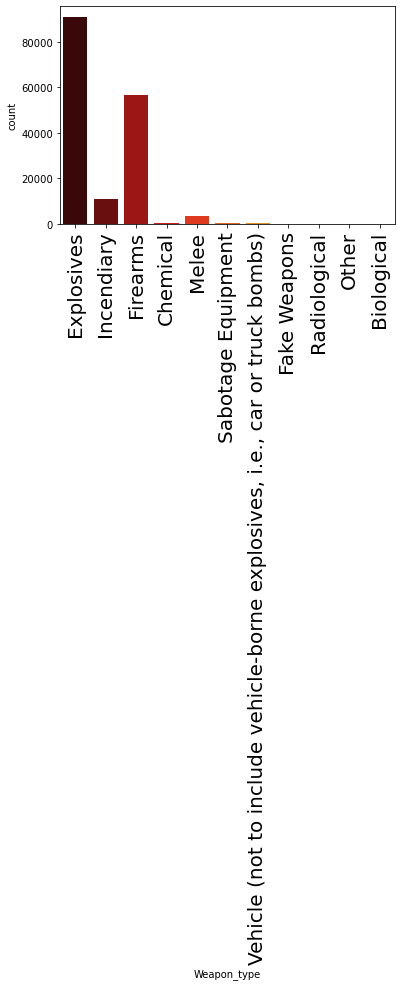

In [9]:
fig,ax = plt.subplots()
ax = sns.countplot(x = 'Weapon_type',data = data,palette = 'hot')
plt.xticks(rotation = 90,fontsize = 20)

Explosives are the most common type of weapons used for the attacks.